In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we have to drop unecessary column


In [7]:
df.drop("other_fuel1",axis=1,inplace=True)
df.drop("other_fuel2",axis=1,inplace=True)
df.drop("other_fuel3",axis=1,inplace=True)
df.drop("wepp_id",axis=1,inplace=True)
df.drop("estimated_generation_gwh",axis=1,inplace=True)
df.drop("generation_gwh_2019",axis=1,inplace=True)
df.drop("generation_gwh_2013",axis=1,inplace=True)

now we have to fill null values 

In [8]:
df["latitude"].fillna(df['latitude'].mean(),inplace=True)
df["longitude"].fillna(df['longitude'].mean(),inplace=True)
df["year_of_capacity_data"].fillna(2019.0,inplace=True)
df["commissioning_year"].fillna(2015.0,inplace=True)
df["owner"].fillna("Sterling Agro Industries ltd.",inplace=True)
df["geolocation_source"].fillna("WRI",inplace=True)
df["generation_data_source"].fillna("Central Electricity Authority",inplace=True)

In [9]:

df["generation_gwh_2014"].fillna(df['generation_gwh_2014'].mean(),inplace=True)
df["generation_gwh_2015"].fillna(df['generation_gwh_2015'].mean(),inplace=True)
df["generation_gwh_2016"].fillna(df['generation_gwh_2016'].mean(),inplace=True)
df["generation_gwh_2017"].fillna(df['generation_gwh_2017'].mean(),inplace=True)
df["generation_gwh_2018"].fillna(df['generation_gwh_2018'].mean(),inplace=True)

In [10]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [11]:
df.shape

(907, 20)

In [12]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,15.734928,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2014.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2015.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

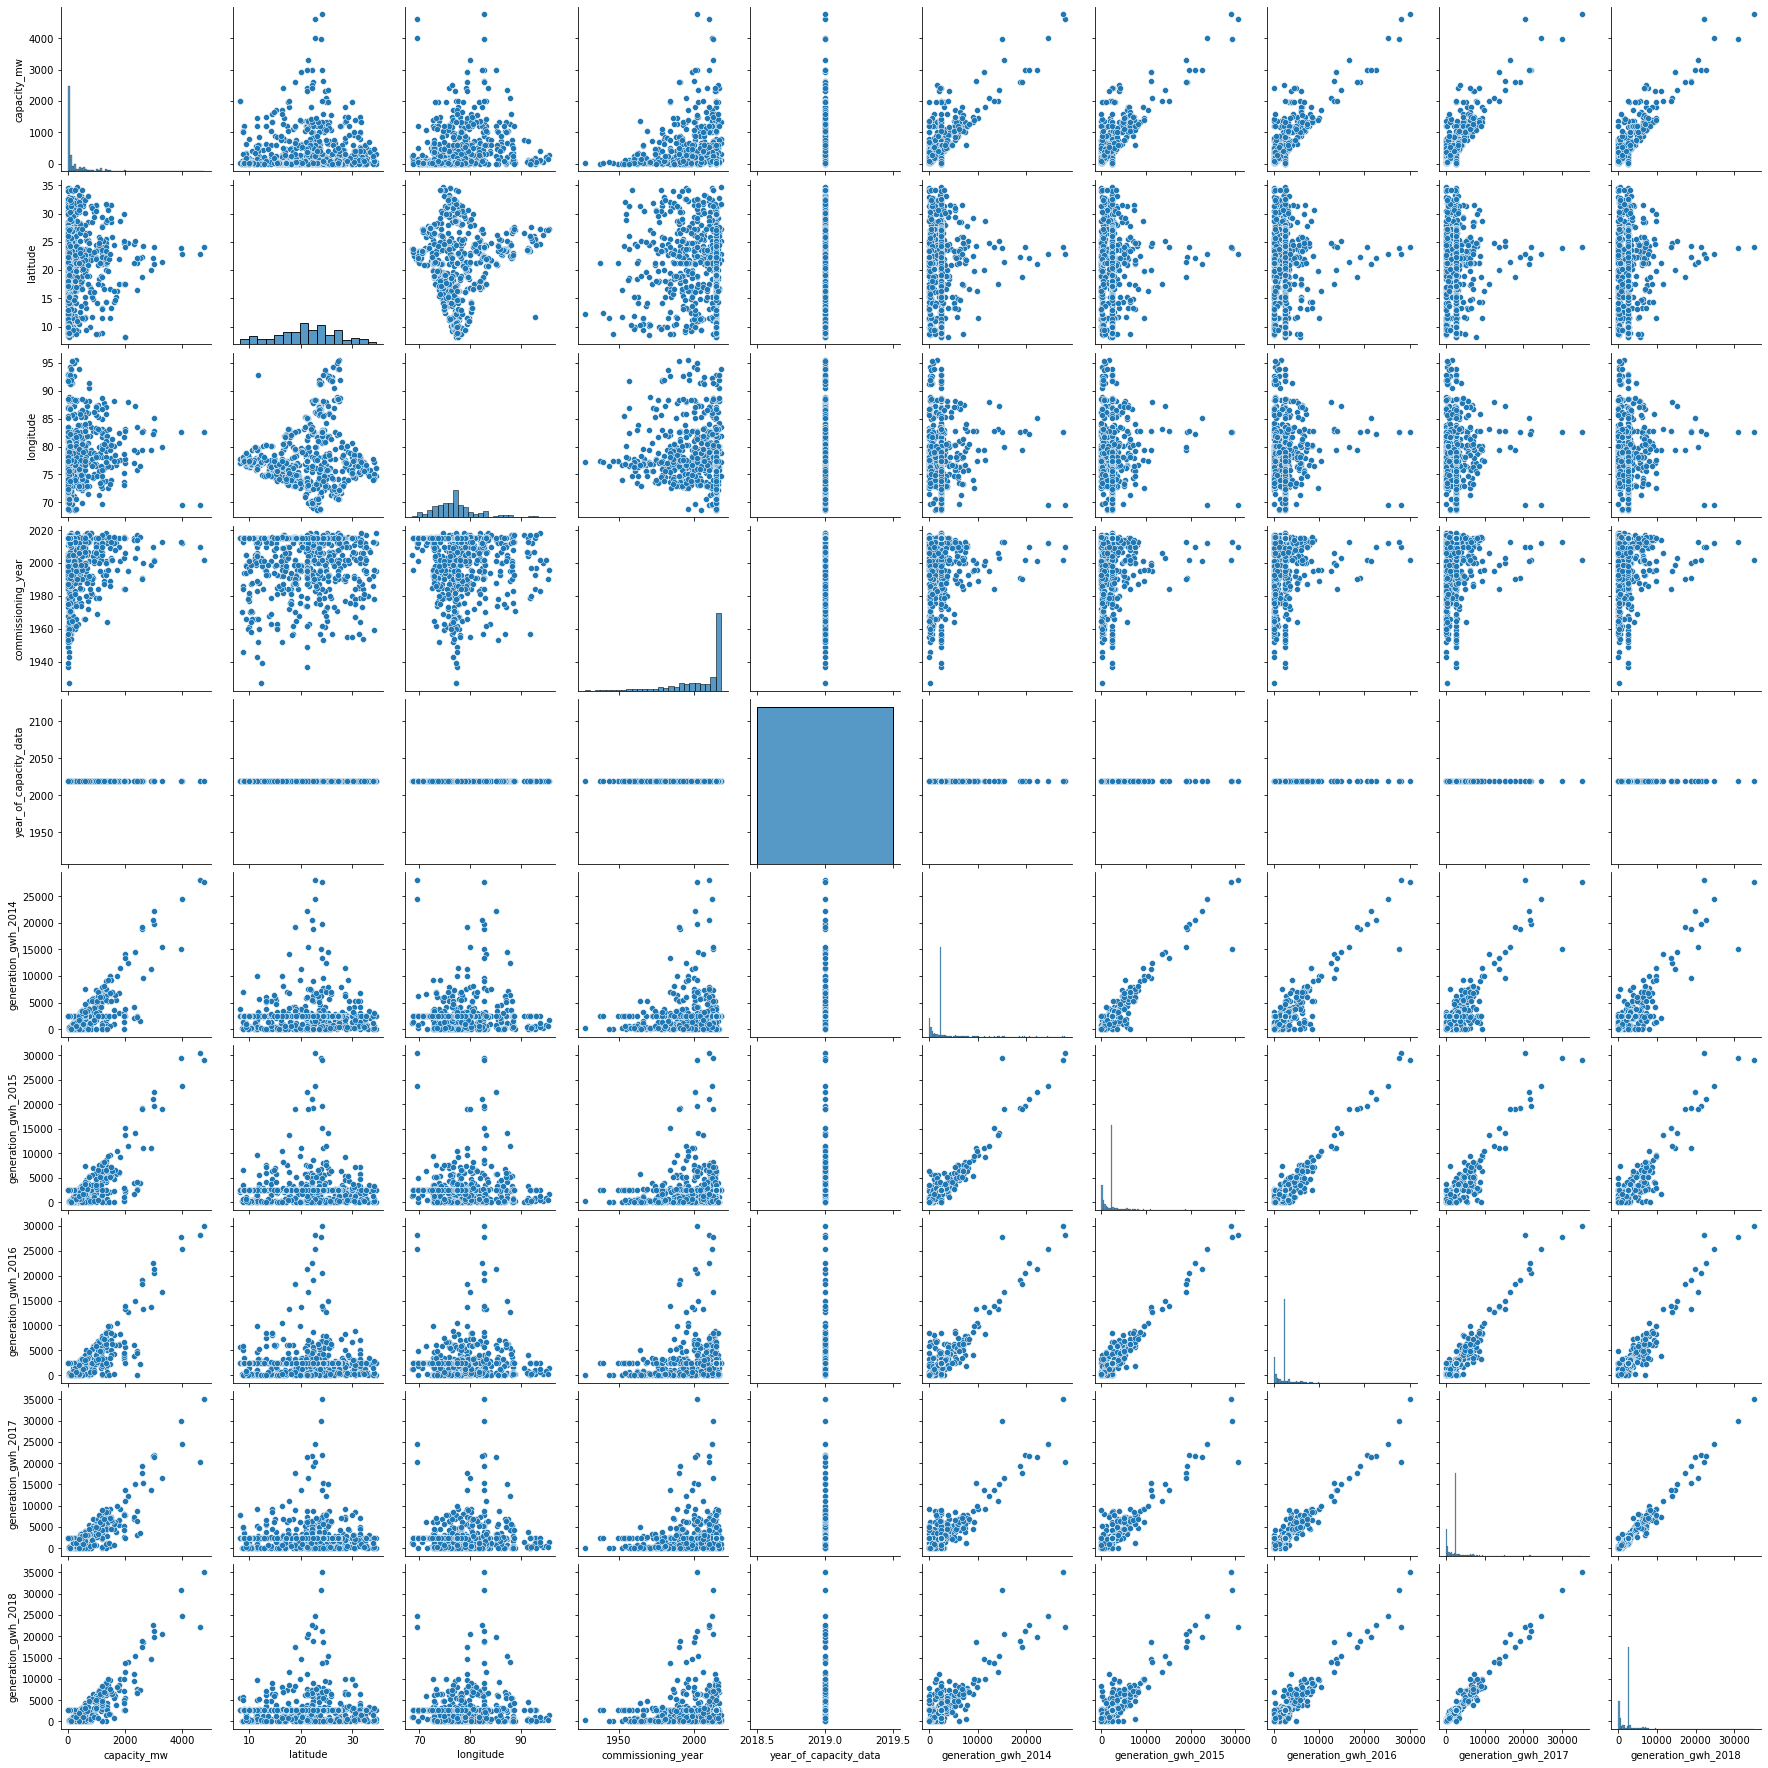

In [14]:
sns.pairplot(df)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='count'>

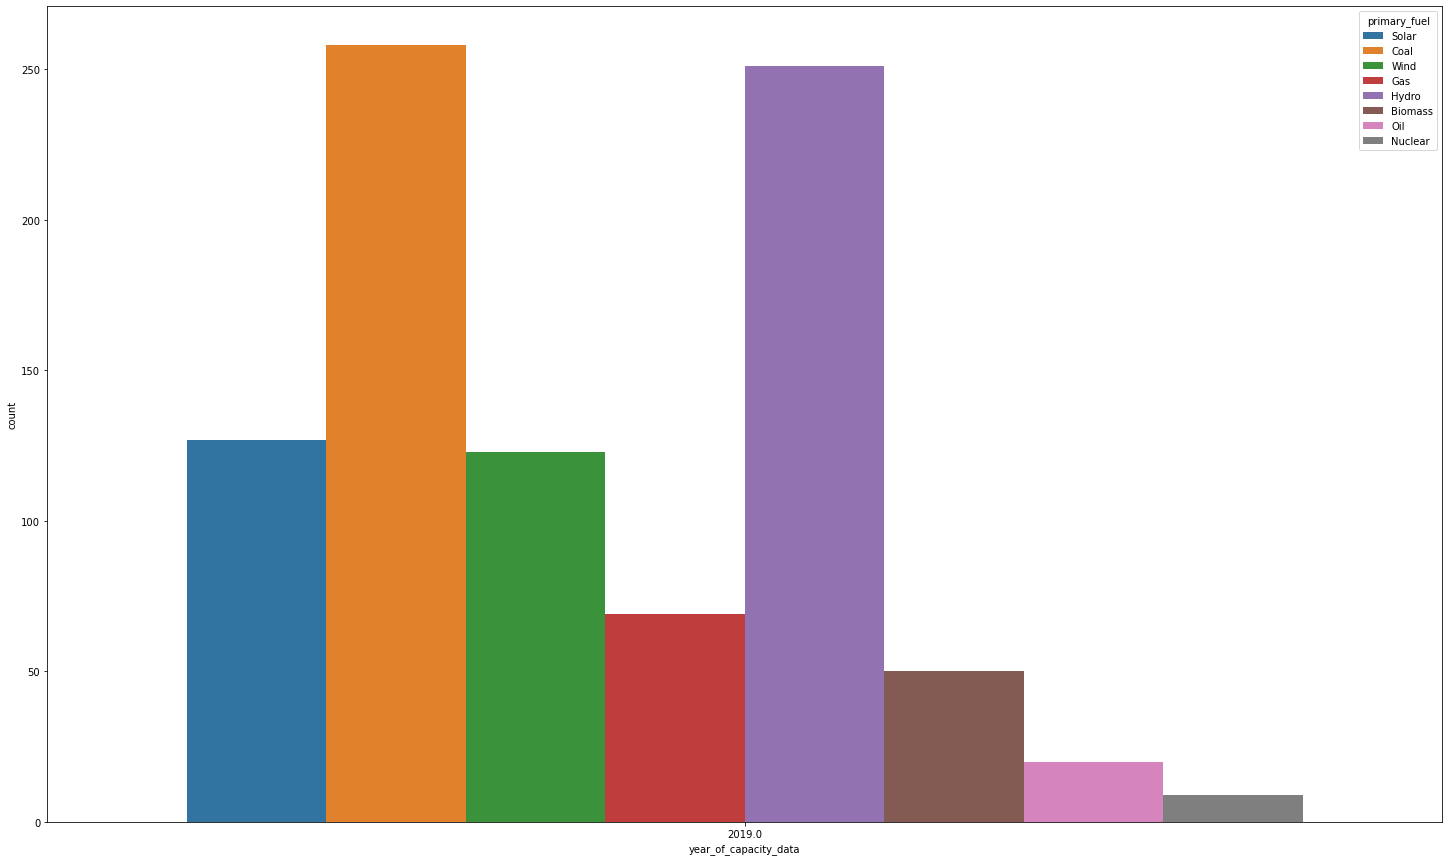

In [15]:
plt.figure(figsize=[25,15])
sns.countplot(df['year_of_capacity_data'], hue='primary_fuel', data=df)

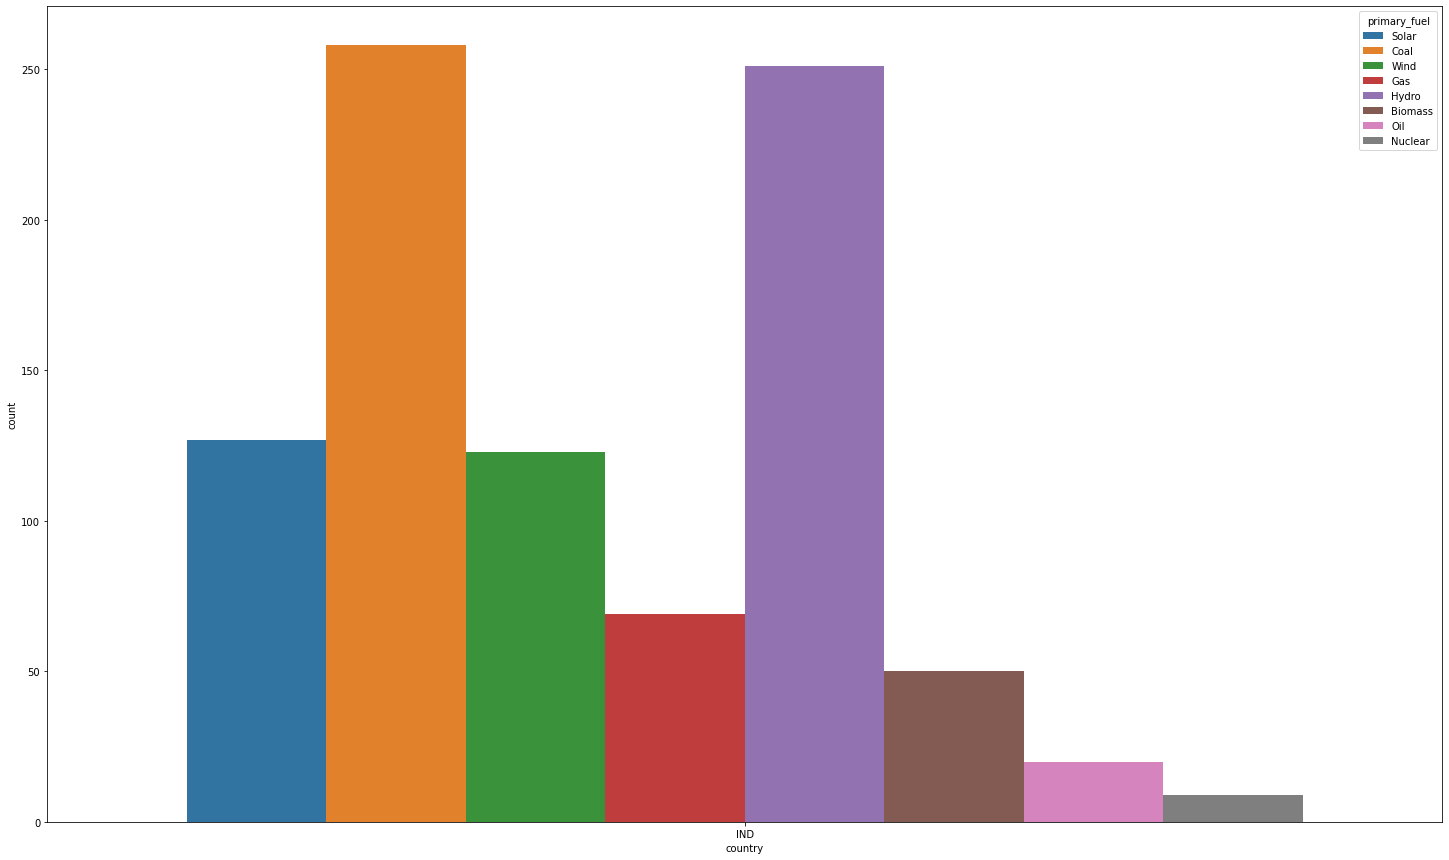

In [16]:
plt.figure(figsize=[25,15])
sns.countplot(df['country'], hue='primary_fuel', data=df);

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

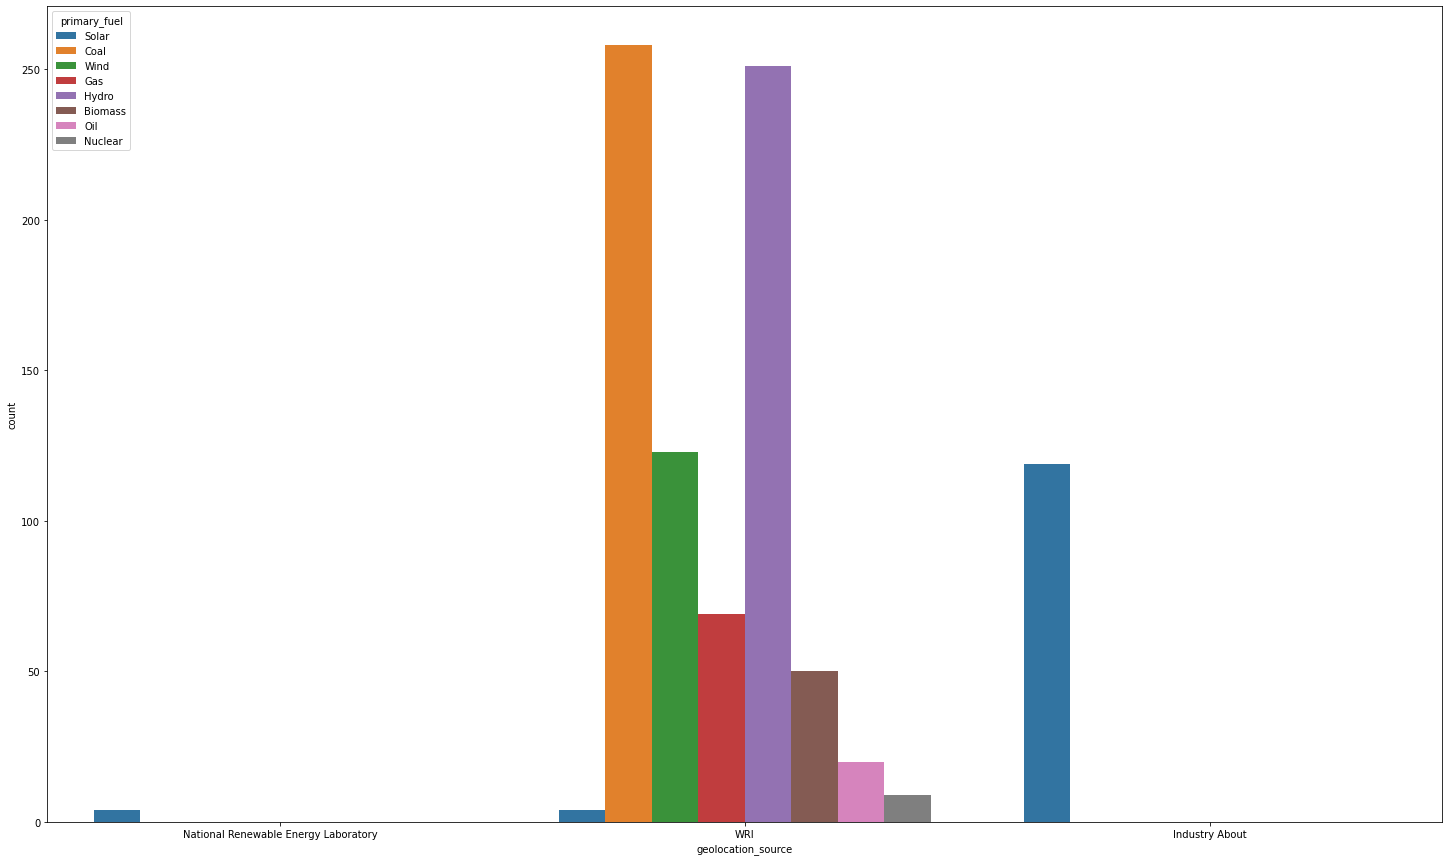

In [17]:
plt.figure(figsize=[25,15])
sns.countplot(df['geolocation_source'], hue='primary_fuel', data=df)

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

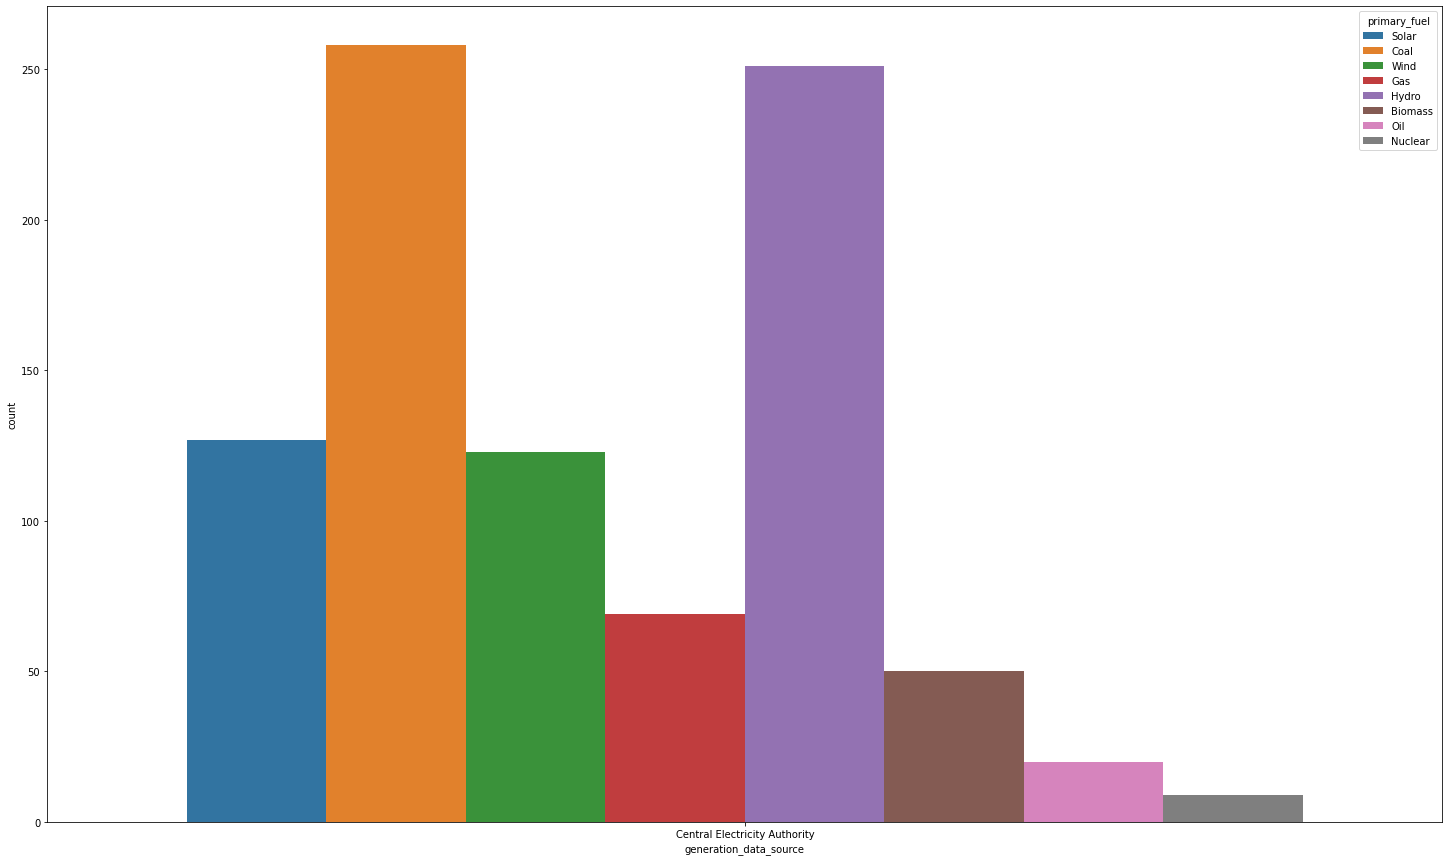

In [18]:
plt.figure(figsize=[25,15])
sns.countplot(df['generation_data_source'], hue='primary_fuel', data=df)

In [19]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [20]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

we have converted categorical data into numerical values.and now we will see correlation

<AxesSubplot:>

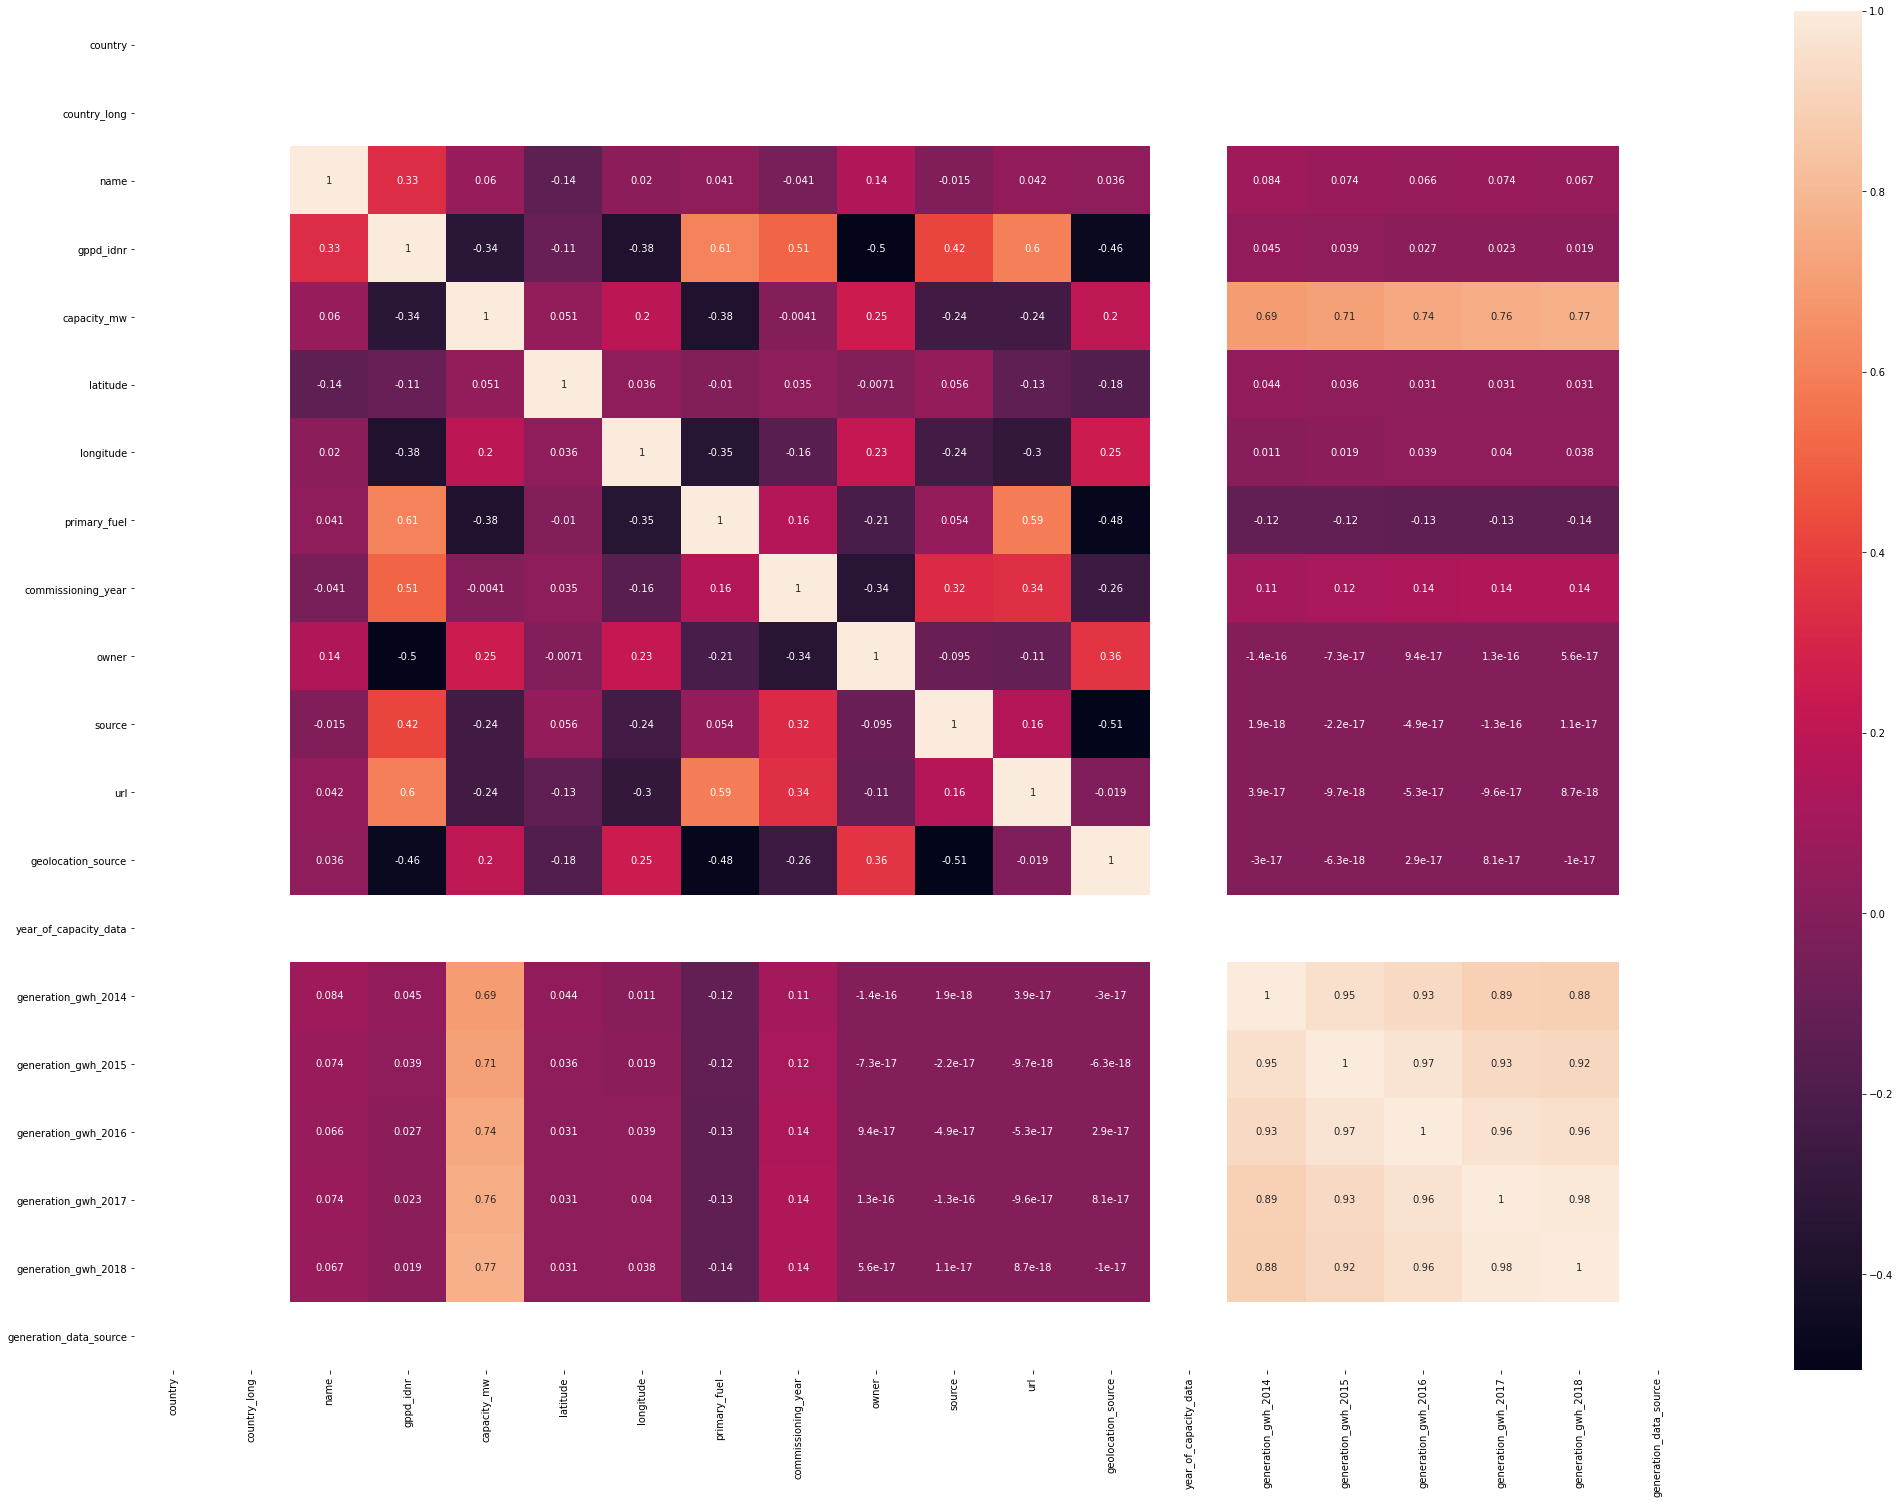

In [21]:
plt.figure(figsize=[35,25])
sns.heatmap(df.corr(),annot=True)

In [22]:
df.corr()["primary_fuel"].sort_values(ascending=False)

primary_fuel              1.000000
gppd_idnr                 0.609180
url                       0.589886
commissioning_year        0.164947
source                    0.053613
name                      0.040753
latitude                 -0.010204
generation_gwh_2014      -0.124769
generation_gwh_2015      -0.124828
generation_gwh_2016      -0.131051
generation_gwh_2017      -0.132003
generation_gwh_2018      -0.136983
owner                    -0.212123
longitude                -0.347948
capacity_mw              -0.380395
geolocation_source       -0.483217
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

gppd_idnr is highly correlated and country,country_long, year_of_capacity_data ,generation_data_source are not correlated so we have to drop these columns

In [23]:
df=df.drop(["country","country_long","generation_data_source","year_of_capacity_data"],axis=1)

In [24]:
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.714873
owner                 -1.604781
source                 1.827373
url                    1.510537
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

we will remove skewness afterwards

<function matplotlib.pyplot.show(close=None, block=None)>

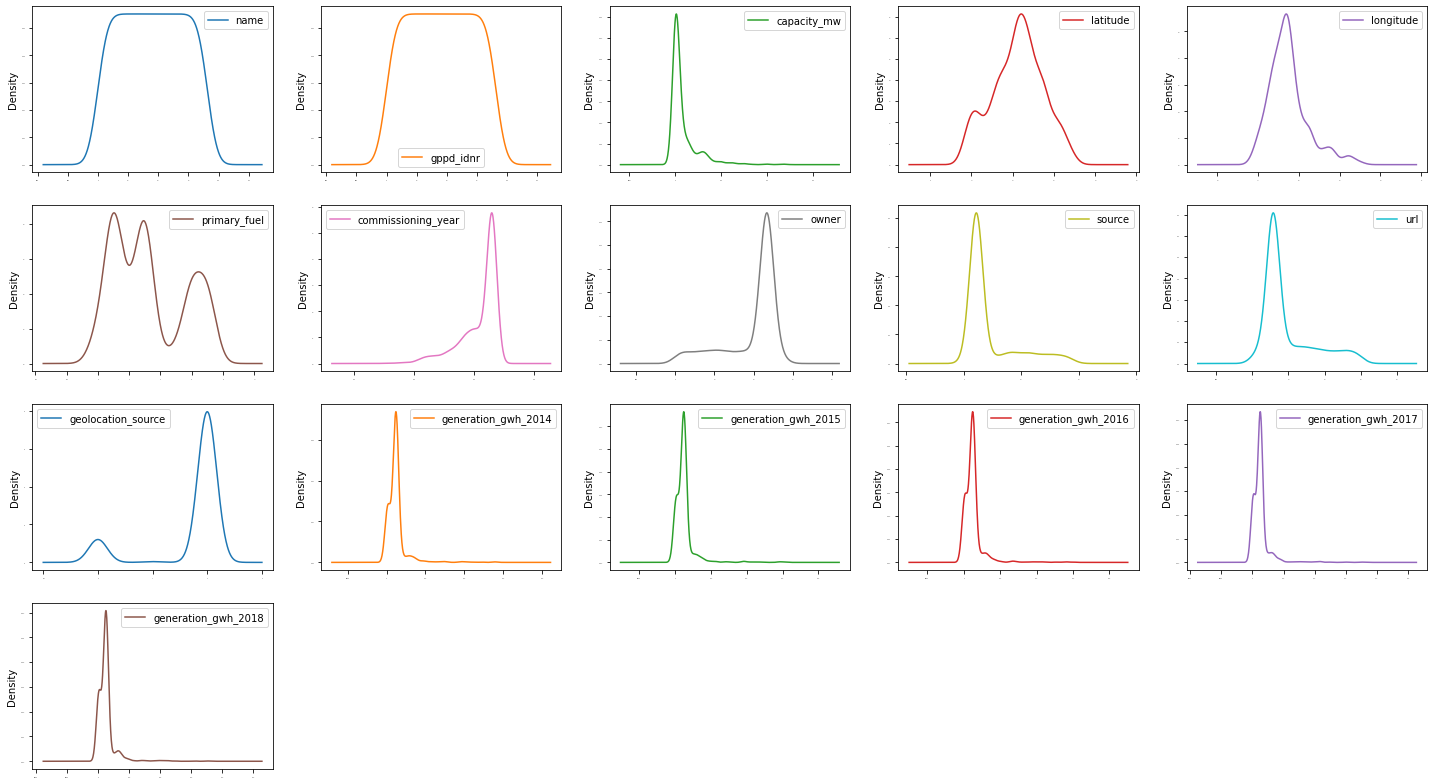

In [25]:
df.plot(kind="density",subplots=True,layout=(7,5),sharex=False,fontsize=1,figsize=(25,25))
plt.show

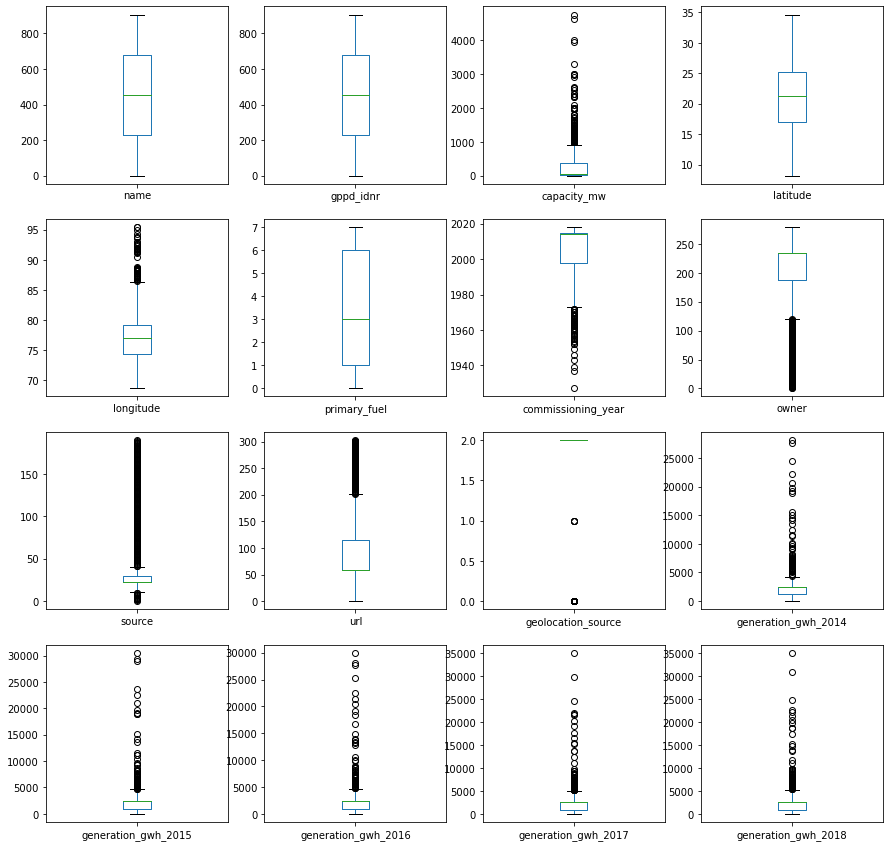

In [26]:
df.plot(kind='box', figsize=(15,15), layout=(4,4), sharex=False, subplots=True);

as we can see there is outlier so we will remove outlier first

In [27]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
        360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
        494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 601, 621,
        638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657,
        661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721, 721,
        721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 726,
        728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808, 808,
        808, 808, 808, 818, 832, 847, 848, 870, 871, 879, 880, 880, 880,
        880, 880, 880, 895, 900], dtype=int64),
 array([ 2, 12, 13, 14, 15,  8,  8,  2, 11, 12, 13, 14, 15,  2, 11,  4,  4,
         8,  2, 11, 12, 13, 14, 15,  6,  4,  8,  2, 11, 12, 13, 14, 15,  

In [28]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2015.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,7.0,2015.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,234.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.0,234.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2016.0,234.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903.0,822.0,3.0,12.8932,78.1654,6.0,2015.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904.0,891.0,25.5,15.2758,75.5811,7.0,2015.0,234.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905.0,539.0,80.0,24.3500,73.7477,1.0,2015.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [29]:
df_new_z.shape

(835, 16)

In [30]:
data_loss=((907-835)/907)*100

In [31]:
data_loss

7.938257993384785

data loss is not too much se we have no problem

In [32]:
df_new=df_new_z

In [33]:
df_new

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2015.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,7.0,2015.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,234.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.0,234.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2016.0,234.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903.0,822.0,3.0,12.8932,78.1654,6.0,2015.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904.0,891.0,25.5,15.2758,75.5811,7.0,2015.0,234.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905.0,539.0,80.0,24.3500,73.7477,1.0,2015.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [34]:
x=df_new.drop("primary_fuel",axis=1)
y=df_new["primary_fuel"]

In [35]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.904007,name
1,6.442629,gppd_idnr
2,2.573484,capacity_mw
3,1.111526,latitude
4,1.282033,longitude
5,1.776439,commissioning_year
6,2.111782,owner
7,1.685612,source
8,2.531402,url
9,2.012914,geolocation_source


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

now we will apply some model to check accuracy

In [38]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 76.04790419161677
[[ 5  3  0  0  0  0  0  0]
 [ 5 32  3  9  0  0  0  0]
 [ 0  2  4  4  0  0  0  0]
 [ 0  6  1 41  1  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 3  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.38      0.62      0.48         8
         1.0       0.71      0.65      0.68        49
         2.0       0.50      0.40      0.44        10
         3.0       0.75      0.84      0.79        49
         4.0       0.00      0.00      0.00         2
         5.0       1.00      0.20      0.33         5
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        24

    accuracy                           0.76       167
   macro avg       0.67      0.59      0.59       167
weighted avg       0.77      0.76      0.75       167



In [39]:
#knn neighbour
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  79.04191616766467
[[ 7  1  0  0  0  0  0  0]
 [ 7 37  1  4  0  0  0  0]
 [ 0  3  6  1  0  0  0  0]
 [ 0  7  4 38  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 1  1  2  1  0  0  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.47      0.88      0.61         8
         1.0       0.73      0.76      0.74        49
         2.0       0.46      0.60      0.52        10
         3.0       0.86      0.78      0.82        49
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         5
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        24

    accuracy                           0.79       167
   macro avg       0.56      0.63      0.59       167
weighted avg       0.78      0.79      0.78       167



In [40]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  82.63473053892216
[[ 6  2  0  0  0  0  0  0]
 [ 3 38  3  5  0  0  0  0]
 [ 1  1  6  1  0  1  0  0]
 [ 0  2  4 41  1  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         8
         1.0       0.83      0.78      0.80        49
         2.0       0.43      0.60      0.50        10
         3.0       0.87      0.84      0.85        49
         4.0       0.00      0.00      0.00         2
         5.0       0.60      0.60      0.60         5
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        24

    accuracy                           0.83       167
   macro avg       0.67      0.70      0.68       167
weighted avg       0.83      0.83      0.83       167



In [41]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  85.02994011976048
[[ 5  3  0  0  0  0  0  0]
 [ 1 45  1  2  0  0  0  0]
 [ 0  2  4  3  0  1  0  0]
 [ 0  3  1 44  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 1  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.71      0.62      0.67         8
         1.0       0.82      0.92      0.87        49
         2.0       0.40      0.40      0.40        10
         3.0       0.90      0.90      0.90        49
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         5
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        24

    accuracy                           0.85       167
   macro avg       0.60      0.61      0.60       167
weighted avg       0.83      0.85      0.84       167



In [42]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  88.62275449101796
[[ 7  1  0  0  0  0  0  0]
 [ 1 44  2  1  0  1  0  0]
 [ 0  2  6  0  0  2  0  0]
 [ 0  2  1 45  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  3  0  0  2  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       0.86      0.90      0.88        49
         2.0       0.50      0.60      0.55        10
         3.0       0.98      0.92      0.95        49
         4.0       0.00      0.00      0.00         2
         5.0       0.33      0.40      0.36         5
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        24

    accuracy                           0.89       167
   macro avg       0.69      0.71      0.70       167
weighted avg       0.89      0.89      0.89       167



In [43]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

scr=cross_val_score(rfc, x, y, cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

scr=cross_val_score(knn, x, y, cv=5)
print ("Cross validation score of knn model :",scr.mean())
      
scr=cross_val_score(gb, x, y, cv=5)
print ("Cross validation score of gb model :",scr.mean())

scr=cross_val_score(dt, x, y, cv=5)
print ("Cross validation score of dt model :",scr.mean())

Cross validation score of Logistic Regression model : 0.7748502994011977
Cross validation score of Random Forest model : 0.8514970059880239
Cross validation score of knn model : 0.7760479041916166
Cross validation score of gb model : 0.8502994011976048
Cross validation score of dt model : 0.8011976047904191


as we can see random forest classifier has highest accuracy so we have to do now hypertuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [45]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [46]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'gini'}

In [47]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(max_depth=890, max_features='sqrt', n_estimators=600)

In [48]:
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 7  1  0  0  0  0  0  0]
 [ 2 43  2  1  0  1  0  0]
 [ 0  2  7  0  0  1  0  0]
 [ 0  3  1 44  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 1  0  3  0  0  1  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 24]]
Accuracy Score 0.874251497005988
Classification report:               precision    recall  f1-score   support

         0.0       0.70      0.88      0.78         8
         1.0       0.84      0.88      0.86        49
         2.0       0.54      0.70      0.61        10
         3.0       0.98      0.90      0.94        49
         4.0       0.00      0.00      0.00         2
         5.0       0.25      0.20      0.22         5
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        24

    accuracy                           0.87       167
   macro avg       0.66      0.69      0.68       167
weighted avg       0.87      0.87      0.87       167



In [49]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.874251497005988

After hypertuning we have get accuracy of 87%

Taking "capacity_mw" As Label

In [50]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2015.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,7.0,2015.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,234.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.0,234.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [51]:
x=df.drop(columns="capacity_mw")
y=df["capacity_mw"]

In [52]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)



In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.793073534826868
cv_score= [0.7078149  0.68731697 0.76572841 0.79975428 0.8015577 ]


In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
neigh = KNeighborsRegressor(n_neighbors=5)
model = neigh.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.789457742946814
cv_score= [0.80467296 0.80471507 0.81369925 0.83451386 0.84884261]


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(max_depth=2, random_state=0)
model=rf.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.7693358694793244
cv_score= [0.77701455 0.7087996  0.75468514 0.80969084 0.80663175]


In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
gbr = GradientBoostingRegressor(random_state=0)
model=gbr.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.8327413688444267
cv_score= [0.84353833 0.80410433 0.82595579 0.8195953  0.86608396]


In [58]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
abr = AdaBoostRegressor(random_state=0)
model=abr.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.7299932532169948
cv_score= [0.70325579 0.42766055 0.77419957 0.78992911 0.83704233]


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
dt =DecisionTreeRegressor (random_state=0)
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.8418391528123959
cv_score= [0.73927139 0.66762129 0.75248121 0.7566869  0.87482677]


we got gradientboostingregressor mor accurate so we do hypertuning

In [60]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='r2', cv=5)
gsearch1.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': range(20, 81, 10)}, scoring='r2')

In [61]:
gsearch1.best_estimator_,gsearch1.best_params_, gsearch1.best_score_

(GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                           min_samples_split=500, n_estimators=20,
                           random_state=10, subsample=0.8),
 {'n_estimators': 20},
 -0.01545134859685402)

In [62]:
 gsearch1.score(x_test,y_test)

0.517476447487334

In [63]:
r2=r2_score(y_test,y_pred)
r2

0.8418391528123959

we got 84% accuracy after hypertuning from gradientboostingregressor